In [1]:
import pandas as pd

In [9]:
nomis_data = pd.read_csv("data/nomis_dataset.csv")
nomis_data = nomis_data.interpolate(method='nearest')
#nomis_data = nomis_data.fillna(0)
#nomis_data.drop(columns=['mnemonic'], inplace=True)
nomis_array = nomis_data.to_numpy()
nomis_data

,% aged 16-64 who are employees,"% all in employment who are - 6: caring, leisure and other service occupations (SOC2010)",% of economically inactive who do not want a job,% who are economically inactive - aged 16-64,% with NVQ4+ - aged 16-64,Economic activity rate - aged 16-64,Population estimates - Aged 65 and over (%),Claimants as a proportion of economically active residents aged 16+
0,59.6,8.3,61.4,27.1,31.8,72.9,19.4,12.5
1,58.5,11.7,78.1,30.6,30.8,69.4,16.4,15.2
2,61.0,10.0,77.8,27.5,28.5,72.5,22.6,10.5
3,65.2,10.5,70.4,20.5,38.3,79.5,18.5,9.3
4,67.3,9.6,68.2,21.1,33.7,78.9,20.5,9.5
...,...,...,...,...,...,...,...,...
354,64.2,9.7,85.4,25.1,30.1,74.9,20.6,9.0
355,67.1,5.9,78.1,16.6,49.3,83.4,25.3,5.5
356,69.9,10.6,72.5,20.3,39.1,79.7,17.2,10.2
357,55.7,8.5,72.2,20.1,41.1,79.9,27.5,6.1


In [61]:
X = nomis_array

# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [62]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[63.31528662 10.20764331 73.90955414 22.71210191 34.21974522 77.28789809
  20.55796178  8.89872611]
 [68.38264463  9.19338843 84.59256198 18.27520661 41.89586777 81.72479339
  21.58429752  6.86280992]
 [65.30123457  6.82716049 74.25061728 19.66666667 56.29012346 80.33333333
  16.33333333  7.97160494]]
[0 0 0 0 0 0 1 0 0 0 1 0 0 2 0 0 2 0 0 0 0 2 2 1 1 0 0 1 0 0 0 0 1 2 1 2 0
 2 1 1 2 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 2 0 0 1 2 0 0 1 0 1 1 1 0 1 2 1 1 1
 0 1 2 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 2 0 0 1 0 0 2 2 1 0 1 1 2 1 1 1 0
 2 0 1 1 1 2 0 0 0 1 2 1 1 1 1 1 1 1 1 1 1 0 1 2 1 0 1 0 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 2 0 1 0 1 0 0 0 0 2 0 0 0 2 2 2 1
 2 2 1 0 1 0 1 2 0 1 2 1 1 1 0 0 2 1 2 1 1 2 2 1 1 2 2 0 0 1 1 2 1 1 0 1 1
 1 0 1 1 1 0 1 0 2 1 0 1 0 1 1 0 1 2 0 0 1 1 0 2 0 0 0 0 1 0 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 0 0 2 2 1 1 0 0 1 1 0 0 0 1 1 0 2 2 2 1 2 2 1 0 1 2 2
 2 1 2 0 0 0 1 0 0 0 

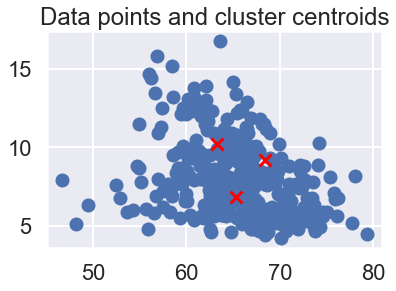

In [71]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [72]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.21244635690317384


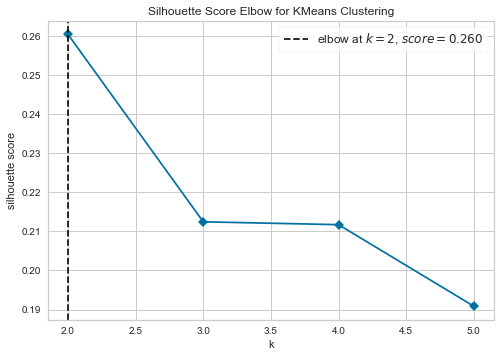

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [74]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()  

In [75]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(X)

In [78]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(digits_proj)
print(silhouette_score(digits_proj, kmeans.labels_))

0.42060974


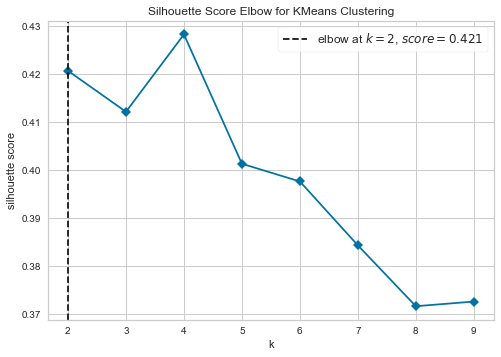

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [81]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(digits_proj)    
visualizer.poof()  